

# Project: Investigate a Dataset (FBI gun data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

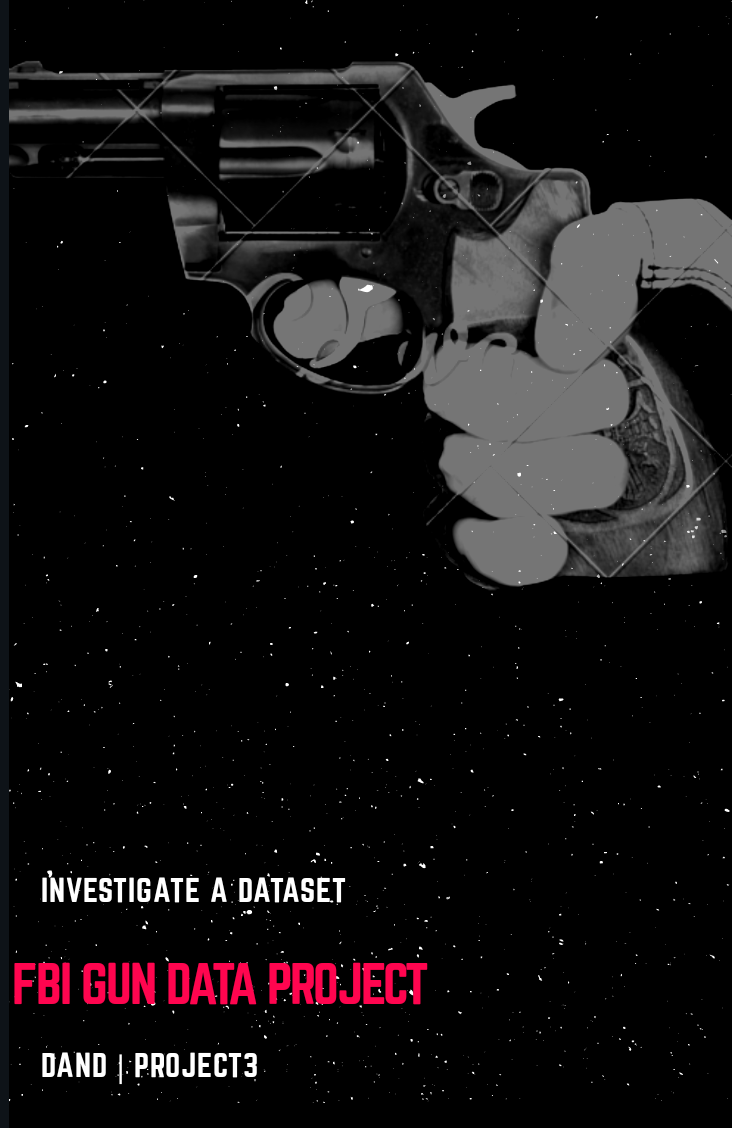

In [ ]:
#<img src='OneDrive/Desktop/gun.png'>
from IPython.display import Image
Image(filename="OneDrive/Desktop/gun.png", width=1050, height=0)



<a id='intro'></a>
# Introduction

**"The National Instant Criminal Background Check System, or NICS, is all about saving lives and protecting people from harm—by not letting guns fall into the wrong hands. It also ensures the timely transfer of firearms to eligible gun buyers. 
Mandated by the Brady Handgun Violence Prevention Act of 1993 and launched by the FBI on November 30, 1998, NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 230 million such checks have been made, leading to more than 1.3 million denials.
NICS is located at the FBI’s Criminal Justice Information Services Division in Clarksburg, West Virginia. It provides full service to FFLs in 30 states, five U.S. territories, and the District of Columbia. Upon completion of the required Bureau of Alcohol, Tobacco, Firearms and Explosives (ATF) Form 4473, FFLs contact the NICS Section via a toll-free telephone number or electronically on the Internet through the NICS E-Check System to request a background check with the descriptive information provided on the ATF Form 4473. NICS is customarily available 17 hours a day, seven days a week, including holidays (except for Christmas)."**



In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(12,7)
import numpy as np
import statsmodels.api as sms;



In [ ]:
# Read in the data

df=pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv')
census_data=pd.read_csv('OneDrive/Desktop/project/u.s.-census-data.csv')



In [ ]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2018-11,Alabama,22477.0,17.0,8408.0,10303.0,357.0,1153,0.0,3.0,...,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,45345
1,2018-11,Alaska,184.0,11.0,2707.0,2827.0,360.0,197,0.0,0.0,...,0.0,0.0,0.0,26.0,39.0,2.0,0.0,0.0,0.0,6645
2,2018-11,Arizona,4537.0,380.0,12412.0,8886.0,1139.0,879,0.0,9.0,...,0.0,0.0,0.0,26.0,24.0,3.0,1.0,0.0,0.0,30385
3,2018-11,Arkansas,2739.0,1163.0,5739.0,10196.0,300.0,914,60.0,9.0,...,0.0,0.0,0.0,11.0,14.0,1.0,1.0,1.0,0.0,24475
4,2018-11,California,33942.0,0.0,36997.0,30913.0,3606.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106380


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13255 entries, 0 to 13254
Data columns (total 27 columns):
month                        13255 non-null object
state                        13255 non-null object
permit                       13231 non-null float64
permit_recheck               1870 non-null float64
handgun                      13235 non-null float64
long_gun                     13236 non-null float64
other                        6270 non-null float64
multiple                     13255 non-null int64
admin                        13232 non-null float64
prepawn_handgun              11312 non-null float64
prepawn_long_gun             11310 non-null float64
prepawn_other                5885 non-null float64
redemption_handgun           11315 non-null float64
redemption_long_gun          11314 non-null float64
redemption_other             5885 non-null float64
returned_handgun             2970 non-null float64
returned_long_gun            2915 non-null float64
returned_other   

In [ ]:

# split the data after '-' in month column to year
df['year'] = df['month'].apply(lambda x: x.split("-")[0]).astype(int)

#split the data after '-' in year column to month
df['months'] = df['month'].apply(lambda x: x.split("-")[1]).astype(int)

df.head(1)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2018-11,Alabama,22477.0,17.0,8408.0,10303.0,357.0,1153,0.0,3.0,...,0.0,13.0,10.0,0.0,0.0,0.0,0.0,45345,2018,11


In [ ]:
census_data.head()
# Drop unsed column such as fact Note column.

df=df.drop('month',axis=1)

In [ ]:
df.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,Alabama,22477.0,17.0,8408.0,10303.0,357.0,1153,0.0,3.0,18.0,...,0.0,13.0,10.0,0.0,0.0,0.0,0.0,45345,2018,11
1,Alaska,184.0,11.0,2707.0,2827.0,360.0,197,0.0,0.0,1.0,...,0.0,26.0,39.0,2.0,0.0,0.0,0.0,6645,2018,11
2,Arizona,4537.0,380.0,12412.0,8886.0,1139.0,879,0.0,9.0,9.0,...,0.0,26.0,24.0,3.0,1.0,0.0,0.0,30385,2018,11
3,Arkansas,2739.0,1163.0,5739.0,10196.0,300.0,914,60.0,9.0,20.0,...,0.0,11.0,14.0,1.0,1.0,1.0,0.0,24475,2018,11
4,California,33942.0,0.0,36997.0,30913.0,3606.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106380,2018,11


<a id='wrangling'></a>
## Data Wrangling

**In this section of the report, we will check for cleanliness,we will  trim and clean our dataset for analysis.**


### drop rows with missing values

In [ ]:
df.isnull().sum()

state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
year                             0
months                           0
dtype: int64

In [ ]:
census_data.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [ ]:
#Drop null values from each file
df.dropna(inplace=True)
census_data.dropna(inplace=True)

In [ ]:
#check for null values, the result sould be False
df.isnull().sum().any()

False

In [ ]:
#check for null values, the result sould be False
census_data.isnull().sum().any()

False


### Data Cleaning (for Nics-Firearm-Background, Gun_Data, and Census_Data)

In this part we will clean our data by remove null and duplicate values in each file

In [ ]:
#print duplicated values, if the result =0, there is no need to  use method drop_duplicatesprint(df.duplicated().sum())
print(df.duplicated().sum())
print(census_data.duplicated().sum())


0
0


In [ ]:
# Drop unsed column such as fact Note column.

census_data =census_data.drop('Fact Note',axis=1)

In [ ]:
#Check for null values after drop fact note
census_data.isnull().sum().sum()

0

In [ ]:
census_data.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
12,"White alone, percent, July 1, 2016, (V2016)",69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,16.80%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,0.50%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,"Asian alone, percent, July 1, 2016, (V2016)",1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,2.90%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
16,Native Hawaiian and Other Pacific Islander alo...,0.10%,1.30%,0.30%,0.30%,0.50%,0.20%,0.10%,0.10%,0.10%,...,0.001,0.001,0.10%,1.00%,Z,0.10%,0.80%,Z,0.10%,0.10%


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1:
#### which state get the highest number of Hispanic or Latino, percent, July 1, 2016,  (V2016)  of census data ?

In [ ]:
#Index fact
census_data.set_index('Fact',inplace=True)
census_data = census_data.T.reset_index()
census_data

Fact,index,"White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,Alabama,69.30%,26.80%,0.70%,1.40%,0.10%,4.20%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145","98,540","1,634,391","67,370,353",1.90%
1,Alaska,66.10%,3.80%,15.20%,6.30%,1.30%,7.00%,"2,221,335","6,375,483",D,"5,216,303","10,474,275","$14,320","20,907","267,999","15,643,303",0.40%
2,Arizona,83.30%,4.90%,5.40%,3.40%,0.30%,30.90%,"13,996,635","37,055,881","51,243,473","69,437,272","84,716,542","$12,927","136,352","2,295,186","102,671,393",2.40%
3,Arkansas,79.40%,15.70%,1.00%,1.60%,0.30%,7.30%,"4,307,264","15,792,628","62,712,925","31,256,110","36,815,256","$12,483","65,175","1,003,113","39,451,191",1.10%
4,California,72.70%,6.50%,1.70%,14.80%,0.50%,38.90%,"90,830,372","248,953,592","512,303,164","666,652,186","481,800,461","$12,665","908,120","14,325,377","856,954,246",3.50%
5,Colorado,87.50%,4.50%,1.60%,3.30%,0.20%,21.30%,"13,617,654","29,488,161","50,447,098","77,034,971","67,815,200","$13,073","161,737","2,253,795","117,539,555",3.30%
6,Connecticut,80.60%,11.80%,0.50%,4.70%,0.10%,15.70%,"9,542,068","29,573,119","55,160,095","161,962,244","51,632,467","$14,381","89,232","1,503,102","92,555,072",1.20%
7,Delaware,70.10%,22.60%,0.60%,4.00%,0.10%,9.20%,"2,148,437","7,003,251","22,597,384","5,628,914","14,456,001","$15,763","24,852","397,385","21,305,227",1.50%
8,Florida,77.60%,16.80%,0.50%,2.90%,0.10%,24.90%,"49,817,925","124,061,425","96,924,106","252,626,608","273,867,145","$14,177","532,830","7,777,990","337,074,525",4.50%
9,Georgia,61.20%,32.00%,0.50%,4.10%,0.10%,9.40%,"18,976,611","51,800,643","155,836,792","143,645,290","119,801,495","$12,077","224,593","3,692,490","174,839,354",4.00%


In [ ]:
#rename the coulumn to (state)
census_data.rename(columns={'index':'state'},inplace = True)

In [ ]:
census_data.head()

Fact,state,"White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,Alabama,69.30%,26.80%,0.70%,1.40%,0.10%,4.20%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145","98,540","1,634,391","67,370,353",1.90%
1,Alaska,66.10%,3.80%,15.20%,6.30%,1.30%,7.00%,"2,221,335","6,375,483",D,"5,216,303","10,474,275","$14,320","20,907","267,999","15,643,303",0.40%
2,Arizona,83.30%,4.90%,5.40%,3.40%,0.30%,30.90%,"13,996,635","37,055,881","51,243,473","69,437,272","84,716,542","$12,927","136,352","2,295,186","102,671,393",2.40%
3,Arkansas,79.40%,15.70%,1.00%,1.60%,0.30%,7.30%,"4,307,264","15,792,628","62,712,925","31,256,110","36,815,256","$12,483","65,175","1,003,113","39,451,191",1.10%
4,California,72.70%,6.50%,1.70%,14.80%,0.50%,38.90%,"90,830,372","248,953,592","512,303,164","666,652,186","481,800,461","$12,665","908,120","14,325,377","856,954,246",3.50%


In [ ]:
#convert srt to float datatype
census =  census_data.iloc[:,1:].columns
for c in census:
     census_data[c] =  census_data[c].str.extract('(\d+)').astype(float)
    
# check the changes
census_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
state                                                                                50 non-null object
White alone, percent, July 1, 2016,  (V2016)                                         50 non-null float64
Black or African American alone, percent, July 1, 2016,  (V2016)                     50 non-null float64
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)             50 non-null float64
Asian alone, percent, July 1, 2016,  (V2016)                                         50 non-null float64
Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)    46 non-null float64
Hispanic or Latino, percent, July 1, 2016,  (V2016)                                  50 non-null float64
Total accommodation and food services sales, 2012 ($1,000)                           50 non-null float64
Total health care and social assistance receipts/revenue, 

In [ ]:
for column in census_data.columns:
    if 'percent' in column:
        census_data[column] = census_data[column]/100

In [ ]:
census_data.describe()

Fact,"White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
count,50.000000,50.000000,50.000000,50.000000,46.000000,50.000000,5.000000e+01,5.000000e+01,4.800000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,5.000000e+01,5.000000e+01,49.000000
mean,0.599000,0.079400,0.008000,0.032400,0.002609,0.085200,3.213317e+06,1.064614e+07,2.776451e+07,2.305322e+07,2.040477e+07,3353.660000,37739.040000,6.102580e+05,3.062786e+07,0.013469
std,0.360115,0.098071,0.023474,0.056697,0.014823,0.097043,8.625175e+06,2.898579e+07,6.795810e+07,6.159037e+07,5.157480e+07,6160.518245,98728.831385,1.586183e+06,8.829298e+07,0.012509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,3.000000e+00,9.000000e+00,5.000000e+00,9.000000e+00,12.000000,20.000000,1.000000e+00,1.000000e+01,0.000000
25%,0.335000,0.000000,0.000000,0.000000,0.000000,0.010000,4.250000e+00,1.425000e+01,5.075000e+01,3.025000e+01,3.725000e+01,13.000000,63.500000,2.000000e+00,4.075000e+01,0.000000
50%,0.770000,0.040000,0.000000,0.020000,0.000000,0.055000,1.300000e+01,4.000000e+01,1.195000e+02,8.200000e+01,8.100000e+01,14.000000,146.500000,1.200000e+01,1.150000e+02,0.010000
75%,0.867500,0.117500,0.010000,0.040000,0.000000,0.110000,8.100000e+01,2.222500e+02,2.816066e+06,6.847500e+02,4.497500e+02,18.500000,823.250000,9.120000e+02,7.722500e+02,0.020000
max,0.940000,0.370000,0.150000,0.370000,0.100000,0.390000,4.928551e+07,1.556661e+08,3.136300e+08,3.417350e+08,2.511677e+08,22183.000000,540298.000000,7.998994e+06,5.130833e+08,0.040000


In [ ]:
#change the name of new_labels = list(census_data.columns)
new_labels = list(census_data.columns)
new_labels[2] ='Black or African American alone percent V2016'
census_data.columns = new_labels

In [ ]:
new_labels = list(census_data.columns)
new_labels[3] ='American Indian and Alaska Native alone percent July V2016'
census_data.columns = new_labels

In [ ]:
new_labels = list(census_data.columns)
new_labels[4] ='Asian alone, percent July V2016'
census_data.columns = new_labels

In [ ]:
new_labels = list(census_data.columns)
new_labels[5] ='Native Hawaiian and Other Pacific Islander alone, percent July 2016 V2016'
census_data.columns = new_labels

In [ ]:
new_labels = list(census_data.columns)
new_labels[6] ='Hispanic or Latino, percent July 2016 V2016'
census_data.columns = new_labels

In [ ]:
new_labels = list(census_data.columns)
new_labels[7] ='Total accommodation and food services sales 2012'
census_data.columns = new_labels

In [ ]:
census_data.head()

,state,"White alone, percent, July 1, 2016, (V2016)",Black or African American alone percent V2016,American Indian and Alaska Native alone percent July V2016,"Asian alone, percent July V2016","Native Hawaiian and Other Pacific Islander alone, percent July 2016 V2016","Hispanic or Latino, percent July 2016 V2016",Total accommodation and food services sales 2012,"Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,Alabama,0.69,0.26,0.00,0.01,0.00,0.04,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
1,Alaska,0.66,0.03,0.15,0.06,0.01,0.07,2.0,6.0,NaN,5.0,10.0,14.0,20.0,267.0,15.0,0.00
2,Arizona,0.83,0.04,0.05,0.03,0.00,0.30,13.0,37.0,51.0,69.0,84.0,12.0,136.0,2.0,102.0,0.02
3,Arkansas,0.79,0.15,0.01,0.01,0.00,0.07,4.0,15.0,62.0,31.0,36.0,12.0,65.0,1.0,39.0,0.01
4,California,0.72,0.06,0.01,0.14,0.00,0.38,90.0,248.0,512.0,666.0,481.0,12.0,908.0,14.0,856.0,0.03


In [ ]:
#total_gun = df.groupby(df['year'])['totals'].sum().reset_index()

In [ ]:
#plt.subplots(figsize = (10,5))
#plt.bar(total_gun['year'],total_gun['totals'])
#plt.title('Number of Gun Registrations Per Year 2015-2018')
#plt.xlabel('Year')
#plt.ylabel('Total # of Gun Permits Issued')

In [ ]:
#merge Two datasets
df_combined = df.merge(census_data, left_on='state', right_on='state', how='inner')

In [ ]:
df_combined.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,Total accommodation and food services sales 2012,"Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,Alabama,22477.0,17.0,8408.0,10303.0,357.0,1153,0.0,3.0,18.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
1,Alabama,23244.0,1.0,5218.0,5918.0,229.0,279,0.0,10.0,14.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
2,Alabama,19471.0,0.0,4978.0,5832.0,241.0,271,0.0,15.0,6.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
3,Alabama,22465.0,0.0,5991.0,5741.0,218.0,274,0.0,12.0,6.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01
4,Alabama,20642.0,0.0,5110.0,4540.0,222.0,222,0.0,9.0,7.0,...,7.0,26.0,124.0,57.0,58.0,12.0,98.0,1.0,67.0,0.01


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 44 columns):
state                                                                        1400 non-null object
permit                                                                       1400 non-null float64
permit_recheck                                                               1400 non-null float64
handgun                                                                      1400 non-null float64
long_gun                                                                     1400 non-null float64
other                                                                        1400 non-null float64
multiple                                                                     1400 non-null int64
admin                                                                        1400 non-null float64
prepawn_handgun                                                              1400 non-null float64
prepa

<a id='eda'></a>
### Question 1:

**what is the states with the highest number of Hispanic or Latino, percent July 2016 V2016?**

C:\Users\farah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


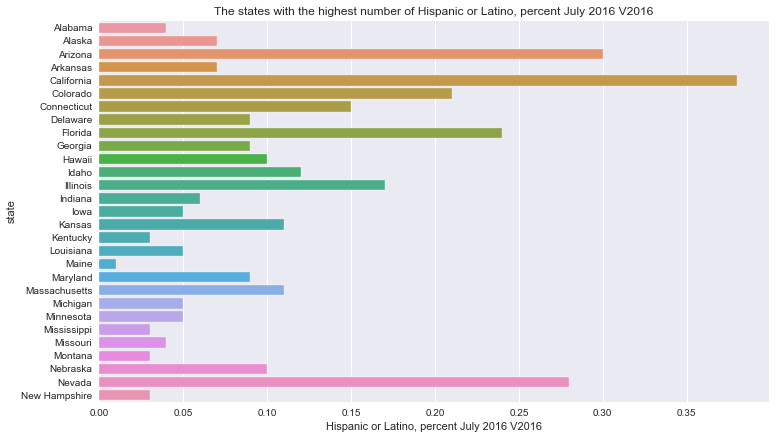

In [ ]:
sns.barplot(y='state', x='Hispanic or Latino, percent July 2016 V2016' ,data=df_combined[:800]).set_title('The states with the highest number of Hispanic or Latino, percent July 2016 V2016');

<a id='eda'></a>
### Answer:

**After the data become ready for display, we wanted to know which state contains the highest number of Hispanic or Latino, percent July 2016 V2016.
As the graph illustrates, California has the largest number of them.**

###  Question 2:
#### In this question, we would like to know how many handguns are available against the number of states.

In [ ]:
df_total= df_combined.groupby(['state'])['handgun'].mean()
df_total.sort_values()

state
Hawaii                0.000000
Nebraska            136.714286
Iowa                191.500000
Rhode Island       1068.857143
North Carolina     1471.321429
Vermont            1487.214286
North Dakota       1572.464286
Wyoming            1739.535714
Delaware           1785.678571
South Dakota       2551.535714
Montana            2821.857143
Alaska             2877.178571
Maine              3356.535714
Utah               3683.785714
Idaho              3774.214286
Maryland           4374.285714
New Jersey         4771.571429
Nevada             4794.714286
New Hampshire      5176.321429
Massachusetts      5260.000000
New Mexico         5768.964286
Arkansas           5813.428571
Connecticut        5834.714286
Kansas             5909.214286
West Virginia      6575.392857
Minnesota          7244.892857
Alabama            7769.535714
Mississippi        8394.892857
South Carolina     9879.857143
New York           9927.892857
Kentucky          10121.500000
Michigan          11260.821429
Lo

In [ ]:
states = df_total.sort_values(ascending=False).head(100)
states 



state
Florida           51670.678571
Pennsylvania      47343.428571
Texas             46174.357143
California        41216.035714
Ohio              26378.964286
Tennessee         24732.142857
Illinois          24572.428571
Virginia          23132.142857
Missouri          20141.750000
Indiana           20050.964286
Colorado          18910.857143
Washington        16737.178571
Oregon            14101.535714
Georgia           13957.250000
Wisconsin         13875.714286
Arizona           12668.500000
Oklahoma          11818.535714
Louisiana         11338.142857
Michigan          11260.821429
Kentucky          10121.500000
New York           9927.892857
South Carolina     9879.857143
Mississippi        8394.892857
Alabama            7769.535714
Minnesota          7244.892857
West Virginia      6575.392857
Kansas             5909.214286
Connecticut        5834.714286
Arkansas           5813.428571
New Mexico         5768.964286
Massachusetts      5260.000000
New Hampshire      5176.321429
Ne

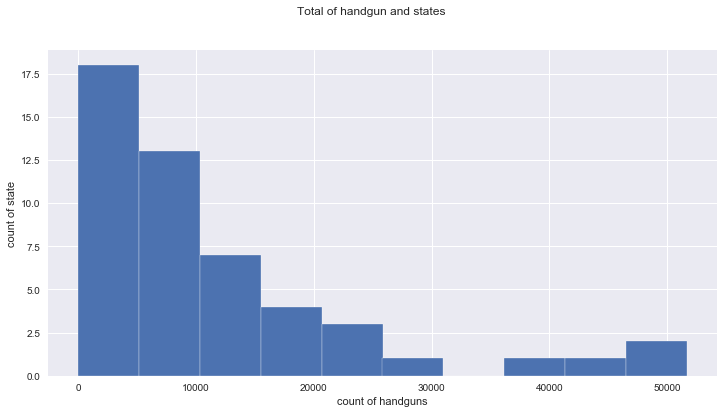

In [ ]:
#state_And_handgun= df.groupby('state')['handgun'].sum()
fig = plt.figure(figsize=(12,6))
plt.hist(states)
fig.suptitle('Total of handgun and states')
plt.xlabel('count of handguns')
plt.ylabel('count of state')
plt.show();


### Answer :
**As we can see, the largest number of handguns was about 5,000. They were recorded in more than seventeen states.**

###  Question 3:
#### In this question, we would like to know the month which occurred the largest number of long gun purchases?


In [ ]:
total_of_long_gun_per_months = df_combined.groupby('months').sum().long_gun

total_of_long_gun_per_months

months
1      703205.0
2      855597.0
3     1001753.0
4      751934.0
5      628063.0
6      622173.0
7      598620.0
8     1228866.0
9     1273666.0
10    1473666.0
11    1948529.0
12    1492554.0
Name: long_gun, dtype: float64

In [ ]:
total_of_handg_gun_per_months=df_combined.groupby('months').sum().handgun
total_of_handg_gun_per_months

months
1     1061075.0
2     1376532.0
3     1529919.0
4     1183558.0
5     1036263.0
6     1039389.0
7      913622.0
8     1592521.0
9     1442069.0
10    1609179.0
11    2004703.0
12    1625246.0
Name: handgun, dtype: float64

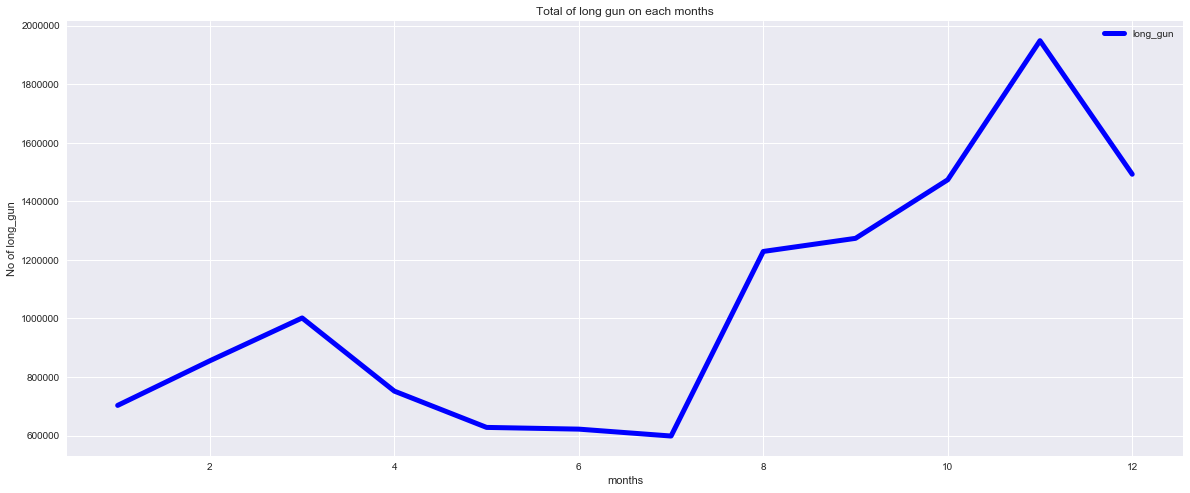

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(total_of_long_gun_per_months, color='blue',linewidth=5)
plt.xlabel('months')
plt.ylabel('No of long_gun')
plt.title('Total of long gun on each months')
plt.legend()
plt.show;



### Answer:
#### We can notice that month of December recorded the highest purchase of long gun approximately with 2000000 total of purchase.


In [ ]:
gun_alltime = df_combined.groupby(['year', 'state'])['totals'].sum()
gun_alltime

year  state         
2016  Alabama            239533
      Alaska              40744
      Arizona            185555
      Arkansas           120054
      California        1039015
      Colorado           236192
      Connecticut         93404
      Delaware            26233
      Florida            608567
      Georgia            261291
      Hawaii               6317
      Idaho               69405
      Illinois           782393
      Indiana            403314
      Iowa                76150
      Kansas              90405
      Kentucky          1434975
      Louisiana          188664
      Maine               52742
      Maryland            74707
      Massachusetts       96542
      Michigan           235926
      Minnesota          303783
      Mississippi        132693
      Missouri           257060
      Montana             60246
      Nebraska            38214
      Nevada              62345
      New Hampshire       69974
      New Jersey          51106
                   


### Question 4:
**which state is encompass least affected by total of purchase of gun?**

In [ ]:
total=df_combined.groupby(['state'])['totals'].sum()
bottom10state=total.sort_values(ascending=False).head(10)
bottom10state

state
Kentucky        10584753
Illinois         4912896
California       3796240
Texas            3690682
Florida          2967842
Pennsylvania     2492319
Indiana          2053166
Ohio             1768176
Tennessee        1701787
Minnesota        1534899
Name: totals, dtype: int64

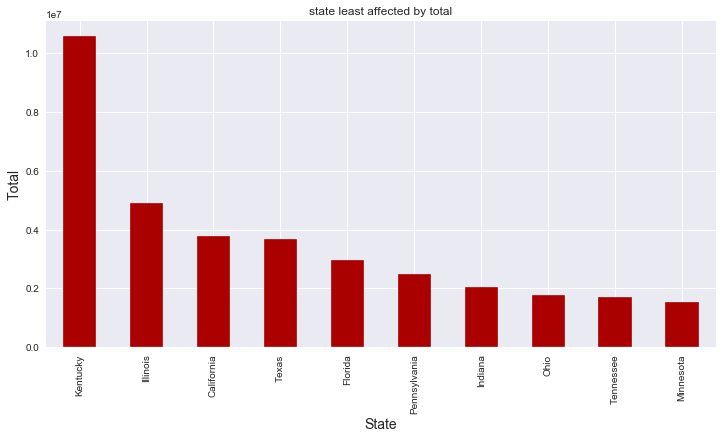

In [ ]:
plt.figure(figsize=(12,6))
chart=bottom10state.plot(kind="bar", color='#AA0000', title= 'state least affected by total');
chart.set_xlabel('State', fontsize=14);
chart.set_ylabel('Total', fontsize=14);



### Answer :
**As we can see,the state encompass least affected by total is  Minnesota with 1534899.**

In [ ]:
#total_by_state=df_combined.groupby(['state'])['White alone', 'Black or African American alone', 'American Indian and Alaska Native alone','Asian alone','Native Hawaiian and Other Pacific Islander alone','Hispanic or Latino','totals'].sum()
#least=total_by_state.sort_values('totals').head(10)
#least

###  Question 5:
#### What is highest gun purchase for each prospective buyer ?


In [ ]:
new_labels = list(df_combined.columns)
new_labels[28] ='White alone'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)
new_labels[29] ='Black or African American alone'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)
new_labels[30] ='American Indian and Alaska Native alone'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)
new_labels = list(df_combined.columns)
new_labels[31] ='Asian alone'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)

new_labels = list(df_combined.columns)
new_labels[32] ='Native Hawaiian and Other Pacific Islander alone'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)
new_labels = list(df_combined.columns)
new_labels[33] ='Hispanic or Latino'
df_combined.columns = new_labels
new_labels = list(df_combined.columns)


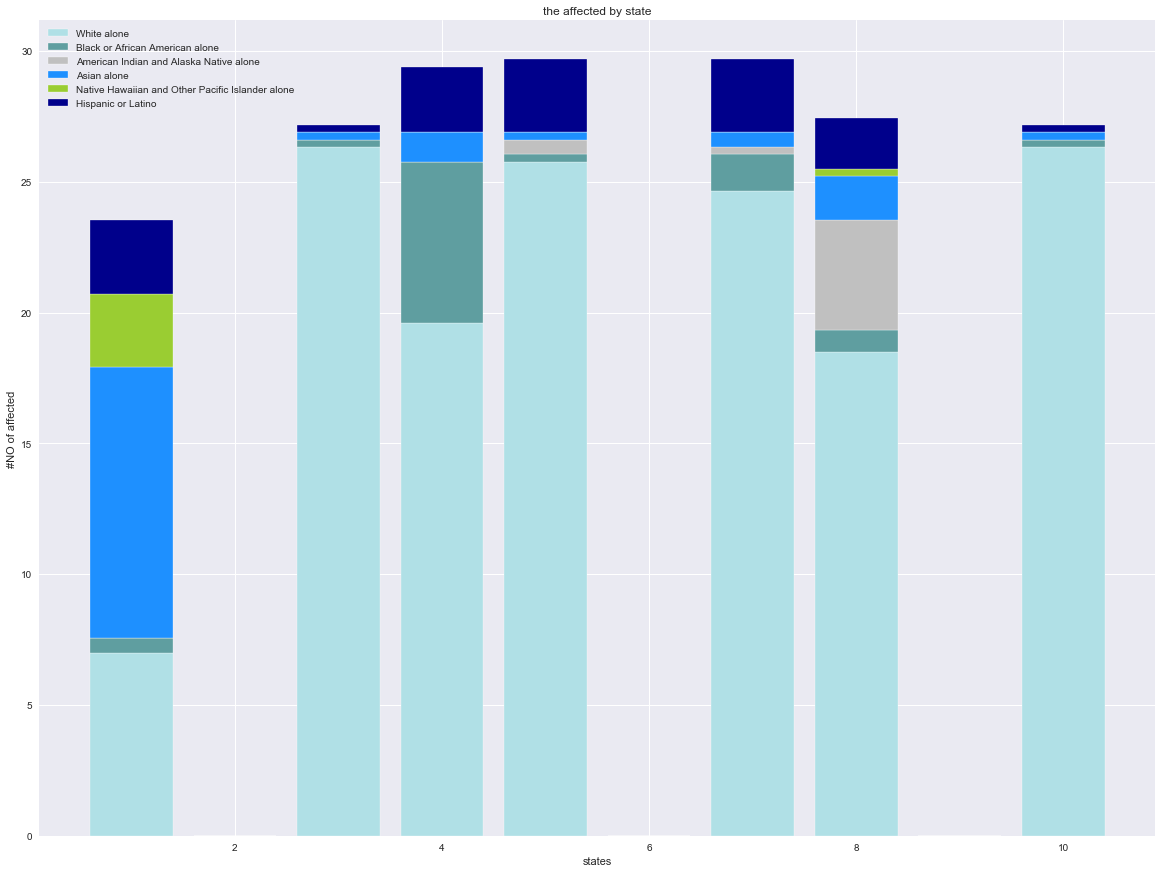

In [ ]:
sns.set_style('darkgrid')
f, ax = plt.subplots(1,figsize=(20,15))
bar_1=[i+1 for i in range(len(least['White alone']))]

ax.bar(bar_1, least['White alone'], label ='White alone', color='powderblue', width=0.8)
ax.bar(bar_1, least['Black or African American alone'],bottom=least['White alone'], label ='Black or African American alone', color='cadetblue', width=0.8)
ax.bar(bar_1, least['American Indian and Alaska Native alone'], bottom=[i+j for i,j in zip(least['White alone'], least['Black or African American alone'])], label ='American Indian and Alaska Native alone', color='silver', width=0.8) 

ax.bar(bar_1, least['Asian alone'], bottom=[i+j+k for i,j,k in zip(least['White alone'], least['Black or African American alone'], least['American Indian and Alaska Native alone'])], label ='Asian alone', color='dodgerblue', width=0.8) 

ax.bar(bar_1, least['Native Hawaiian and Other Pacific Islander alone'], bottom=[i+j+k+l for i,j,k,l in zip(least['White alone'], least['Black or African American alone'],least['American Indian and Alaska Native alone'],least['Asian alone'])], label ='Native Hawaiian and Other Pacific Islander alone', color='yellowgreen', width=0.8) 

ax.bar(bar_1, least['Hispanic or Latino'], bottom=[i+j+k+l+m for i,j,k,l,m in zip(least['White alone'], least['Black or African American alone'],least['American Indian and Alaska Native alone'],least['Asian alone'],least['Native Hawaiian and Other Pacific Islander alone'])], label ='Hispanic or Latino', color='darkblue', width=0.8) 

ax.set_title("the affected by state")
ax.set_xlabel("states")
ax.set_ylabel("#NO of affected")

plt.legend(loc='upper left');


### Answer :
**From the previous chart we can notice that
(Hispanic or Latino) with least number on each state but recorded the high purchase of gun. On the other hand
 (white alone) recorded the highest number of gun purchase on each state**.

<a id='conclusions'></a>
## Conclusions

**This analysis helped us to discover the whole idea of FBI guns in the US state. The data allowed us to observe trends of Purchases of guns between each state and what we found from these data: from asking the questions and working with data I found the answers that I worked for, which is about the states and months recorded the highest purchases of guns.**

<a id='conclusions'></a>
## Resources

1- https://www.fbi.gov/services/cjis/nics


In [ ]:
df.to_csv('df.csv', index=False)
census_data.to_csv('census_data.csv', index=False)